## Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Problem Statement


A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using data based approach. During a recent hiring drive, you were selected for the Data Science team as a Junior data scientist. Your team has been tasked with creating a report which recommends players for the main team. To start with, a total 15 players are required. Player data for all teams has been acquired from FIFA. This data contains information about the palyers, the clubs they are currently playing for and various performance measures.
**There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management make a decision regarding potential players.**


### Loading the data set

In [3]:
# laoding the data as fifa 

fifa = pd.read_csv('fifa.csv')

In [4]:
# top 5 rows of the data

fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# 

<font color="#21618C" size=6px>
<b> Data Preprocessing 
    </b>
</font>

### Dropping the unneccessory columns

In [5]:
# Columns in the fifa DataFrame

fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [6]:
# Dropping the unneccessory columns

fifa.drop(['ID','Photo','Flag','Club Logo','Jersey Number'],axis = 1,inplace = True)

* Dropping photo,flag,club logo just because they contain the name of the file.So it not neccessory for our analysis.
* Dropping Jersey Number is same for many players and we can't analyize anything on this.

In [7]:
# Data Frame after dropping columnns.

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [8]:

fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Nationality               18207 non-null  object 
 3   Overall                   18207 non-null  int64  
 4   Potential                 18207 non-null  int64  
 5   Club                      17966 non-null  object 
 6   Value                     18207 non-null  object 
 7   Wage                      18207 non-null  object 
 8   Preferred Foot            18159 non-null  object 
 9   International Reputation  18159 non-null  float64
 10  Weak Foot                 18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Work Rate                 18159 non-null  object 
 13  Body Type                 18159 non-null  object 
 14  Positi

### Converting the columns to required datatype

In [9]:
# Function for removing the Euro symbol and 'M' or 'K' from the value and changing it to float.
# There arae some Nan values in the columns. Pandas treats Nan values as float.

def currency(x):
    if type(x) == float :
        return x
    else:
        if x[-1] == 'M':
            y=x[1:-1]
            return float(y)
        elif x[-1] == 'K':
            y=x[1:-1]
            return (float(y)/1000)
        else:
            y=x[1:]
            return (float(y)/1000000)

In [10]:
fifa['Value'] = fifa['Value'].apply(currency)

In [11]:
fifa['Wage'] = fifa['Wage'].apply(currency)

In [12]:
fifa['Release Clause'] = fifa['Release Clause'].apply(currency)

In [13]:
# Function for removing qutation mark from the value and changing it to float.

def height(x):
    if type(x)==float:
        return x
    else:
        y= x.replace("'",".")
        return float(y)

In [14]:
fifa.Height = fifa.Height.apply(height)

In [15]:
# Function for removing lbs from the value and changing it to float.

def weight(x):
    if type(x)==float:
        return x
    else:
        y= x.replace("lbs","")
        return float(y)

In [16]:
fifa.Weight = fifa.Weight.apply(weight)

In [17]:
# Function for accessing the year form the value and changing it to int.

def join(x):
    if type(x)==float:
        return 0
    else:
        y= x[-4:]
        return int(y)

In [18]:
fifa.Joined = fifa.Joined.apply(join)

In [19]:
# Changing the data type as Datetime of the column Contract valid Until.

fifa['Contract Valid Until'] = fifa['Contract Valid Until'].astype('datetime64[ns]')

In [20]:
# Diplay the column we converted.

fifa.loc[:,['Name','Value','Wage','Release Clause','Height','Weight','Joined','Contract Valid Until']].head()

,Name,Value,Wage,Release Clause,Height,Weight,Joined,Contract Valid Until
0,L. Messi,110.5,0.565,226.5,5.70,159.0,2004,2021-01-01
1,Cristiano Ronaldo,77.0,0.405,127.1,6.20,183.0,2018,2022-01-01
2,Neymar Jr,118.5,0.290,228.1,5.90,150.0,2017,2022-01-01
3,De Gea,72.0,0.260,138.6,6.40,168.0,2011,2020-01-01
4,K. De Bruyne,102.0,0.355,196.4,5.11,154.0,2015,2023-01-01


# 

## Dealing with Missing Values

In [21]:
# Visualise the missing values in columns

fifa.isnull().sum()[fifa.isnull().sum()!=0]

Club                          241
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy                     48
LongPassing                    48
BallControl                    48
Acceleration                   48
SprintSpeed                    48
Agility                        48
Reactions                      48
Balance                        48
ShotPower                      48
Jumping                        48
Stamina       

In [22]:
data = fifa[fifa.Marking.notnull()]
# data contains not null values.

### 1. Plot the distribution of Overall rating for all players. 

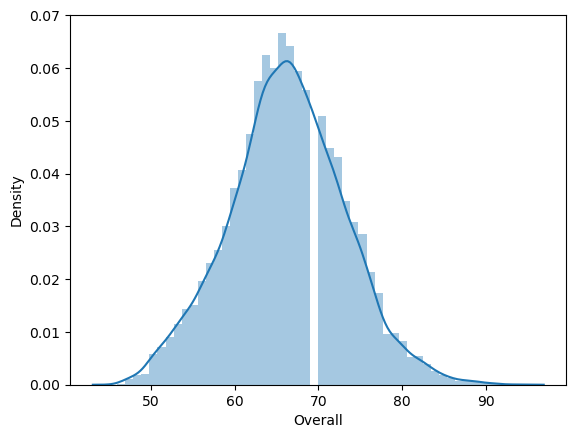

In [23]:
sns.distplot(data.Overall)
plt.show()

### 2.	Generate pair plots for the following variables: 
### Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


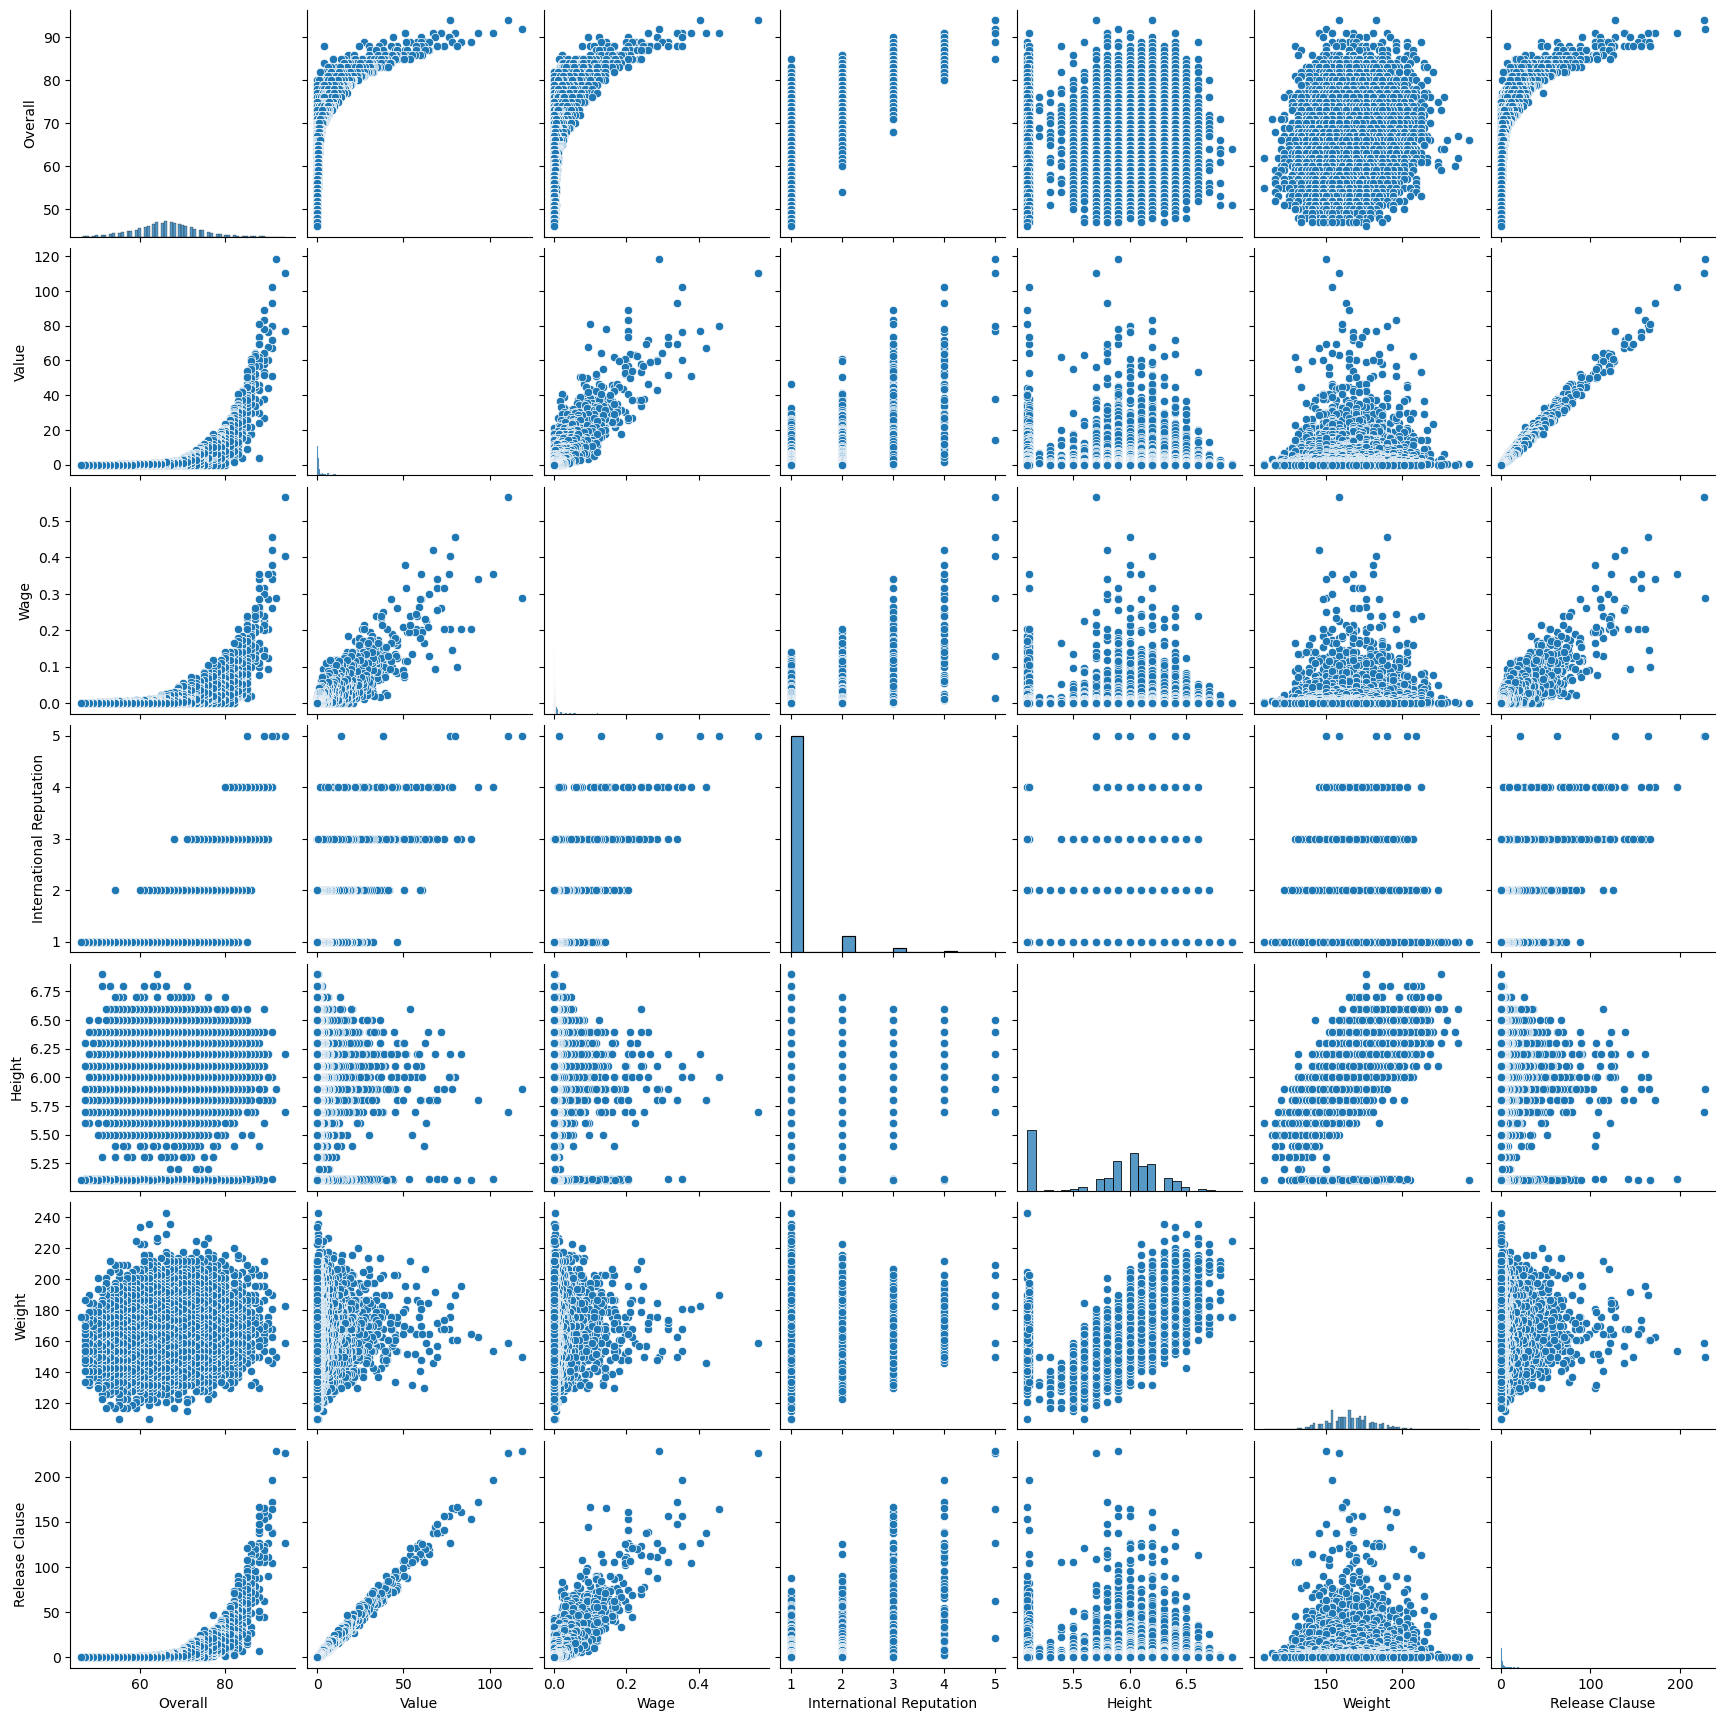

In [24]:
var_df = data.loc[:,['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']]

sns.pairplot(var_df)

### 3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
* 	What would the average wage for this set of players be?
*	What is the average age?
*	Is there a correlation between the Overall rating and Value for these players?


In [25]:
# converting the column to date time

data['Contract Valid Until'] = pd.to_datetime(data['Contract Valid Until'])

In [26]:
# Creating the table of top 20 players

top_20 = data[data['Contract Valid Until'].dt.year == 2020].sort_values(by='Overall',ascending = False).head(20)

In [27]:
top_20.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,De Gea,27,Spain,91,93,Manchester United,72.0,0.260,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
6,L. Modrić,32,Croatia,91,91,Real Madrid,67.0,0.420,Right,4.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137.4
8,Sergio Ramos,32,Spain,91,91,Real Madrid,51.0,0.380,Right,4.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104.6
5,E. Hazard,27,Belgium,91,91,Chelsea,93.0,0.340,Right,4.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1
13,David Silva,32,Spain,90,90,Manchester City,60.0,0.285,Left,4.0,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111.0


In [28]:
# What would the average wage for this set of players be?
print('Average wage for this set o fplayers:',top_20.Wage.mean())

Average wage for this set o fplayers: 0.20545


In [29]:
# What is the average age?
print('Average age:',top_20.Age.mean())

Average age: 30.65


In [30]:
# Is there a correlation between the Overall rating and Value for these players?
top_20.loc[:,['Overall','Value']].corr()

,Overall,Value
Overall,1.000000,0.786717
Value,0.786717,1.000000


Yes there is a high correlation between Overall and Value.

### 4.	Generate tables containing the top 5 players by Overall rating for each unique position.
*	Are there any players appearing in more than one Table. Please point out such players.
*	What is the average wage one can expect to pay for the top 5 in every position?


In [31]:
# Unique positions in the Data.

data.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [32]:
# Creating the data frame for top 5 players for each position

position = ['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
            'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
            'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB']

df = pd.DataFrame(columns = data.columns)
for i in position:
    x= data[data.Position == i].sort_values(by = 'Overall',ascending = False).head(5)
    y = pd.DataFrame(x)
    df = df.append(y)

In [33]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,0.565,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
50,D. Mertens,31,Belgium,87,87,Napoli,45.0,0.135,Right,3.0,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76.5
528,D. Valeri,32,Argentina,80,80,Portland Timbers,11.5,0.012,Right,2.0,...,83.0,39.0,40.0,30.0,15.0,15.0,8.0,10.0,12.0,17.3
890,L. Podolski,33,Germany,78,78,Vissel Kobe,6.5,0.011,Left,3.0,...,79.0,54.0,39.0,39.0,10.0,9.0,16.0,9.0,9.0,8.1
1774,C. Ciano,28,Italy,75,75,Frosinone,6.5,0.017,Left,1.0,...,74.0,24.0,23.0,20.0,9.0,12.0,9.0,9.0,7.0,11.7


In [34]:
df.Name.value_counts()

L. Messi         1
P. Aubameyang    1
M. Parolo        1
D. De Rossi      1
I. Gueye         1
                ..
L. Bonucci       1
R. Varane        1
Piqué            1
Thiago Silva     1
J. Mojica        1
Name: Name, Length: 135, dtype: int64

#### Here we see that all the player appear only once.

In [35]:
# Average wages (in Millions) for each position.

df.groupby('Position')['Wage'].mean()

Position
CAM    0.1740
CB     0.1396
CDM    0.2170
CF     0.0474
CM     0.1306
GK     0.1928
LAM    0.0816
LB     0.1772
LCB    0.1620
LCM    0.1844
LDM    0.1266
LF     0.1212
LM     0.1646
LS     0.1302
LW     0.2610
LWB    0.0342
RAM    0.0454
RB     0.1554
RCB    0.2310
RCM    0.2408
RDM    0.1050
RF     0.1480
RM     0.1314
RS     0.1322
RW     0.2020
RWB    0.0442
ST     0.2940
Name: Wage, dtype: float64